# Neural Aaditive model training

## Test data download from https://www.kaggle.com/datasets/shivachandel/kc-house-data

### Importing libraries

In [1]:
from nam.config import Configuration
from nam.model import NeuralAdditiveModel
from nam.dataset import AnalysisDataset
from nam.trainer import Trainer
from nam.visualization import load_model, partial_residual_plot

### Sample dataset  

In [10]:
import pandas as pd
path = r'.\test_data'
kc_house_data = pd.read_csv(path + '/kc_house_data.csv')
kc_house_data.drop(columns = ['id', 'date'], inplace =  True)

In [11]:
kc_house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Set configurations  

In [12]:
config = Configuration(output_dir = './test_model')
config.show()

---------------------------------------------------------------------------------------
Directory "./test_model" was created for saving trained model and information.
---------------------------------------------------------------------------------------

output_dir:  ./test_model
device:  cpu
first_layer:  ReLU
first_layer_size:  [512]
hidden_layer_size:  [64, 32]
batch_size:  1024
output_regularization:  1e-05
l2_regularization:  1e-06
lr:  0.01
gamma:  0.995
step_size:  1
num_epochs:  500
test_size:  0.2
validation_size:  0.1


### Create dataset

In [16]:
dataset = AnalysisDataset(config,
                          dataframe = kc_house_data,
                          feature_names = kc_house_data.columns[1:],
                          target_name = kc_house_data.columns[0])

### Create model

In [18]:
model = NeuralAdditiveModel(config,
                            num_in_features = len(dataset.feature_names), 
                            num_first_layer_unit = config.first_layer_size*len(dataset.feature_names), 
                            intercept = dataset.intercept)

### Training loop

Start of training loop
Epoch 1/500
Epoch 100/500
Epoch 200/500
Epoch 300/500
Epoch 400/500
Epoch 500/500
The trained model was saved in "./test_model"


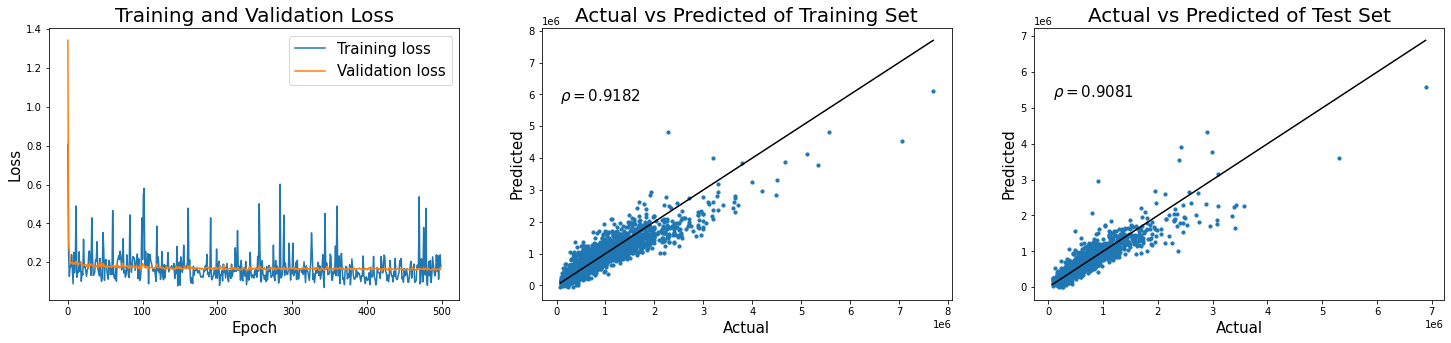

In [19]:
trainer = Trainer(config, model, dataset)
trainer.train()

### Model explanation

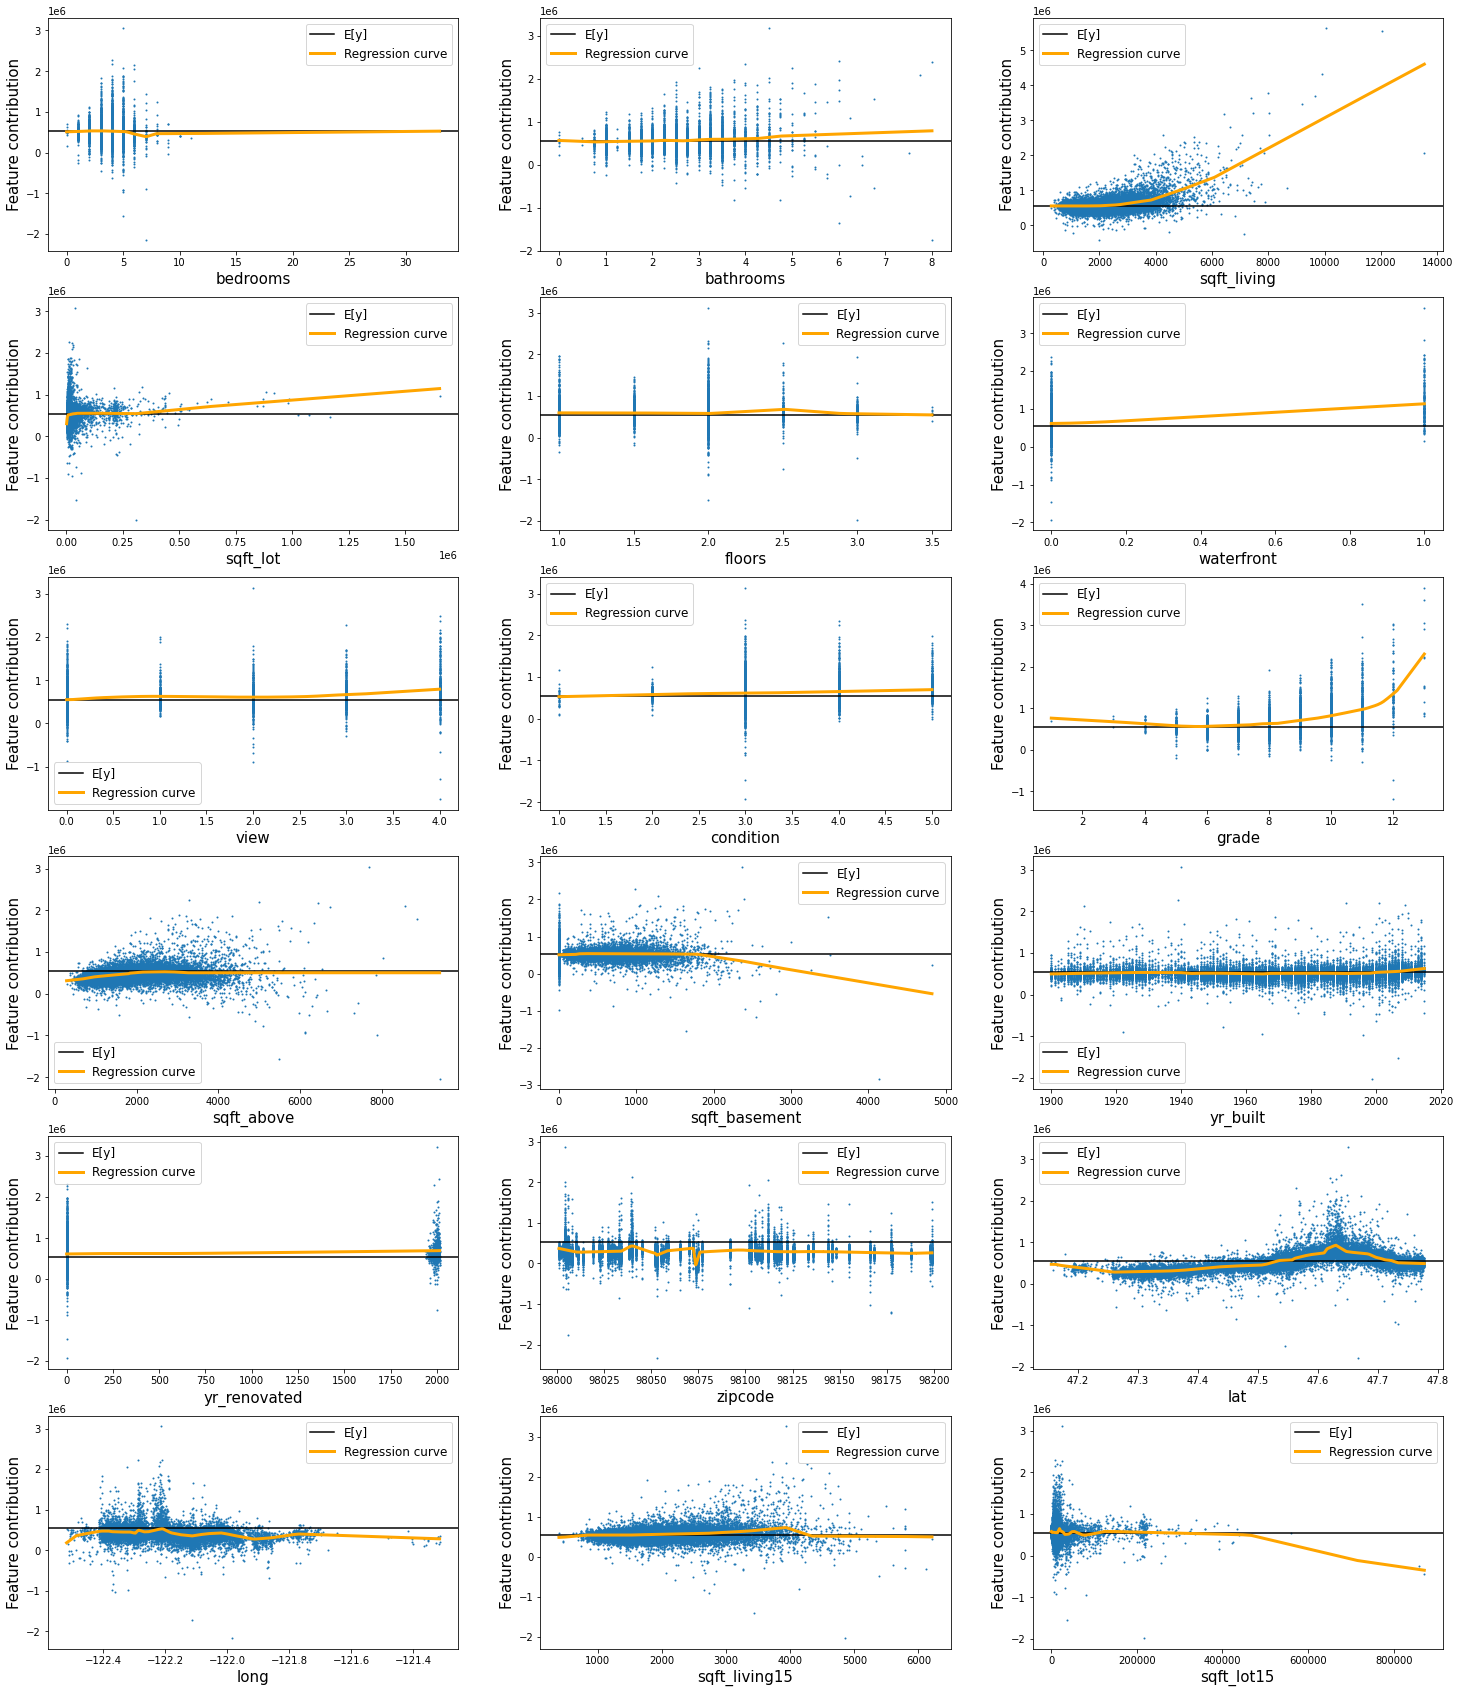

In [20]:
trained_model = load_model(config)
fig = partial_residual_plot(trained_model, dataset)